## Линейная регрессия

На основе набора данных об измерениях роста и веса решим следующие задачи.

Обучим модели линейной регрессии: 
1. Оценивающую действительный вес человека (weight) по сообщенному весу (repwt).
2. Оценивающую рост человека. Для начала построим одномерную модель на данных, используя в качестве целевой переменной рост (height), а в качестве признака вес (weight). Затем расширим набор признаков, добавив данные об сообщенном весе (repwt) и поле человека (sex), и посмотрим, как изменится мера R^2.

Для обучения линейной модели будем использовать класс из библиотеки scikit-learn - [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

В некоторых строках встречаются пропуски. Их уберем из таблицы вместе со всей строкой с помощью pandas.DataFrame.dropna().

In [64]:
import numpy as np
import seaborn as sns
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
observations = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
observations.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


## Задача 1. Оценка веса

In [66]:
observations.isna().sum()

sex        0
weight     0
height     0
repwt     17
repht     17
dtype: int64

In [67]:
observations.dropna(inplace=True)

In [68]:
X = observations.repwt.to_numpy().reshape(-1, 1)
y = observations.weight.to_numpy()

In [69]:
from sklearn.linear_model import LinearRegression
weight_reg = LinearRegression()
weight_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# y = b0 + b1 * x
b1 = weight_reg.coef_[0]
b0 = weight_reg.intercept_

Мера R^2: 0.972


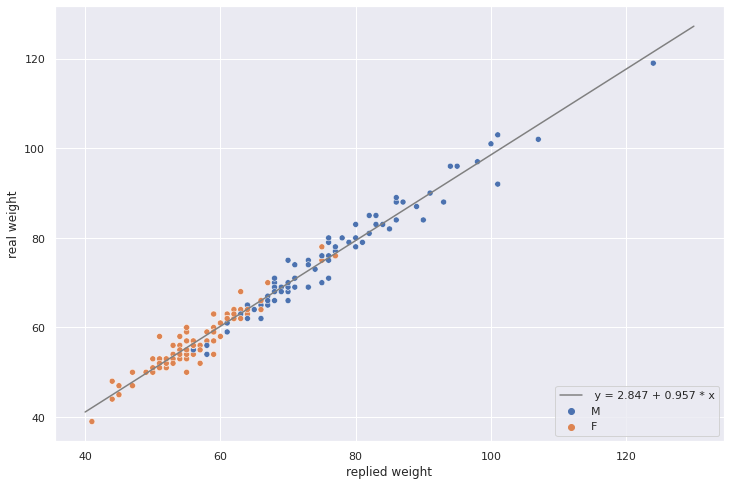

In [71]:
sns.set(rc={'figure.figsize':(12,8)})
#ax = observations.plot.scatter(x='repwt', y='weight',color='grey', figsize=(14,8),s=50);
ax = sns.scatterplot(y='weight', x='repwt', hue='sex', data=observations)
ax.set_xlabel('replied weight');
ax.set_ylabel('real weight');

xx = np.linspace(40, 130);
plot(xx, b0 + b1 * xx, label=' y = {} + {} * x'.format(format(b0, '.3f'), format(b1, '.3f')), color='grey');
ax.legend(loc=4);

print('Мера R^2: {:.3f}'.format(weight_reg.score(X,y)))

## Задача 2. Оценка роста

### По одному признаку weight

In [72]:
X = observations.weight.to_numpy().reshape(-1, 1)
y = observations.height.to_numpy()

In [73]:
height_reg = LinearRegression()
height_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# y = b0 + b1 * x
b1 = height_reg.coef_[0]
b0 = height_reg.intercept_

Мера R^2: 0.591


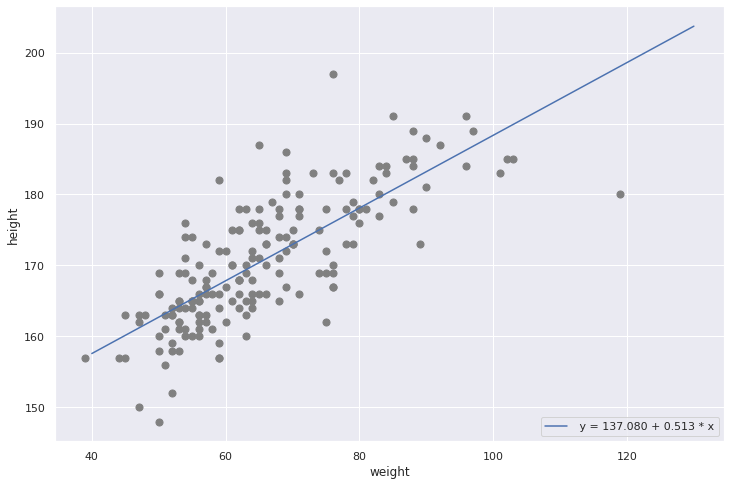

In [75]:
ax = observations.plot.scatter(x='weight', y='height',color='grey', figsize=(12,8),s=50);
ax.set_xlabel('weight');
ax.set_ylabel('height');

xx = np.linspace(40, 130)
plot(xx, b0 + b1 * xx, label=' y = {} + {} * x'.format(format(b0, '.3f'), format(b1, '.3f')));
ax.legend(loc=4);

print('Мера R^2: {:.3f}'.format(height_reg.score(X,y)))

1. Как видно, построенная на одном признаке модель дает низкую оценку, равную 0.591.
2. Вклад свободного члена куда больше, чем вклад, объясненный регрессией.
3. Добавим больше признаков!

### По нескольким признакам: weight, repwt, sex

In [76]:
observations.sex = observations.sex.map({'M': '0', 'F': '1'})

In [77]:
observations.head()

,sex,weight,height,repwt,repht
1,0,77,182,77.0,180.0
2,1,58,161,51.0,159.0
3,1,53,161,54.0,158.0
4,0,68,177,70.0,175.0
5,1,59,157,59.0,155.0


In [78]:
X = observations[['sex', 'weight', 'repwt']]
y = observations.height

In [79]:
height_reg_2 = LinearRegression()
height_reg_2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
print('Мера R^2: {:.3f}'.format(height_reg_2.score(X,y)))
print('Полученные коэффициенты регрессии: ', height_reg_2.coef_)
print('Свободный член: ',height_reg_2.intercept_)

Мера R^2: 0.678
Полученные коэффициенты регрессии:  [-6.57059774e+00  9.63135926e-04  3.35574933e-01]
Свободный член:  152.24707602509258


1. Расширенная модель дает более высокий показатель R^2 = 0.678
2. Однако, вклад свободного члена стал еще больше. Отчасти это связано с тем, что на вход модели мы отправили два сильно коррелированныех признака -- weight и repwt.